In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv("Coursera.csv")
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


# EDA

In [59]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [60]:
df.dtypes

Course Name           object
University            object
Difficulty Level      object
Course Rating         object
Course URL            object
Course Description    object
Skills                object
dtype: object

In [61]:
df["Course Rating"].unique()

array(['4.8', '4.1', '4.6', '4.7', '3.3', '4.9', '4.3', 'Not Calibrated',
       '4', '4.4', '3.4', '4.5', '4.2', '5', '3.5', '3.7', '3', '3.6',
       '3.8', '3.9', '2.9', '2.6', '2.8', '2', '3.1', '3.2', '2.5', '2.4',
       '1', '1.9', '2.3'], dtype=object)

In [62]:
cr=df[["Course Rating"]]

In [63]:
def sub(x):
    if x=="Not Calibrated":
        return np.nan
    return x
    
cr["Course Rating"]=cr["Course Rating"].apply(lambda x: sub(x))

c:\python 37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
cr.isna().sum()

Course Rating    82
dtype: int64

In [65]:
cr[cr.isna().values]

,Course Rating
9,NaN
103,NaN
136,NaN
140,NaN
153,NaN
...,...
3402,NaN
3432,NaN
3443,NaN
3467,NaN


In [66]:
cr.dropna(inplace=True)

c:\python 37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
needed = cr.index

In [68]:
# Fill this with median rating
df = df.iloc[needed]

In [69]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3440,3440,3440,3440,3440,3440,3440
unique,3334,182,5,30,3342,3321,3342
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,523,1425,740,8,8,8


In [70]:
# Convert the Rating to Float
df["Course Rating"]=df["Course Rating"].values.astype(np.float)
df

c:\python 37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


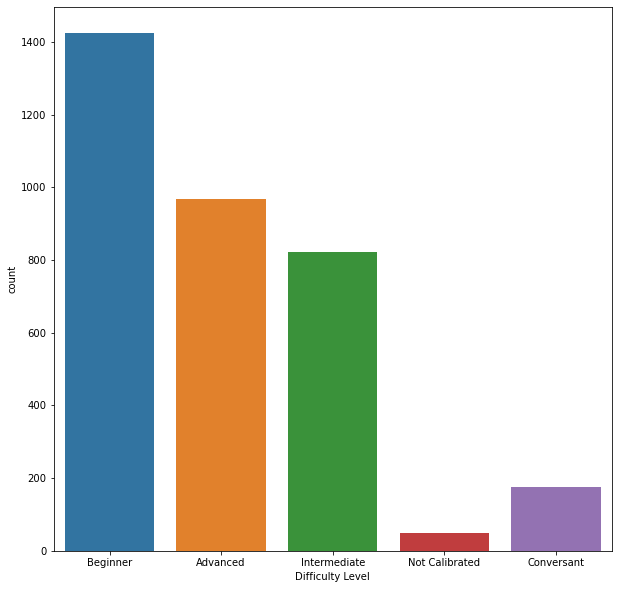

In [71]:
# Check count of Difficulty level
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(df["Difficulty Level"])

In [72]:
# we put not Conversant to mixed
df["Difficulty Level"].unique()

array(['Beginner', 'Advanced', 'Intermediate', 'Not Calibrated',
       'Conversant'], dtype=object)

In [73]:
def sub_level(x):
    if x in ["Not Calibrated", "Conversant"]:
        return "Mixed_Difficulty"
    return x
    
    
df["Difficulty Level"]=df["Difficulty Level"].apply(lambda x : sub_level(x))

c:\python 37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [74]:
miss="Not Calibrated"
df[df["Course Description"].values==miss]

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


In [75]:
df[df["University"].values==miss]

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


In [76]:
df[df["Course URL"].values==miss]

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


In [77]:
df[df["Skills"].values==miss]

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


# Data Transform to Tags
## Course Discription, Skills, University Name, Diffifulty level 

In [78]:
df.University.unique()

array(['Michigan State University', 'Coursera Project Network',
       '�cole Polytechnique', 'IESE Business School',
       'The Chinese University of Hong Kong', 'University of Washington',
       'The State University of New York',
       'University of California, Irvine',
       'University of Colorado System', 'Rice University',
       'University of Geneva', 'University of California, Davis',
       '�cole Polytechnique F�d�rale de Lausanne', 'Google Cloud',
       'National Research Tomsk State University',
       'University of Florida', 'Johns Hopkins University',
       'Saint Petersburg State University', 'Universiteit Leiden',
       'The University of Edinburgh', 'Columbia University',
       'Korea Advanced Institute of Science and Technology(KAIST)',
       'University of Maryland, College Park', 'IBM',
       'The Hong Kong University of Science and Technology',
       'University of Illinois at Urbana-Champaign',
       'University of Cape Town', 'Goldman Sachs', 'Uni

In [79]:
def sub_err_un(x):
    err="�"
    err2 ="/ ????? (?????????? ??????????????? ???????? ????????????? ????????? ??? ??????)"
    if err in x:
        return x.replace(err,"")
    if err2 in x:
        return x.replace(err2,"~")
    return x
df.University=df.University.apply(lambda x : sub_err_un(x)).values

c:\python 37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [80]:
s = "Hello"
s.replace('e','o')

'Hollo'

In [81]:
df.University

0                               Michigan State University
1                                Coursera Project Network
2                                      cole Polytechnique
3                                    IESE Business School
4                                Coursera Project Network
                              ...                        
3517                               University of Michigan
3518                               University of Virginia
3519                                 Macquarie University
3520    Korea Advanced Institute of Science and Techno...
3521                                         Google Cloud
Name: University, Length: 3440, dtype: object

### Skills ---->List 

In [82]:
s = df.Skills.iloc[-1]

In [83]:
df.Skills.unique()

array(['Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art',
       'Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy',
       'chemistry  physics  Solar Energy  film  lambda calculus  Electrical Engineering  electronics  energy  silicon  thinning physical-science-and-engineering electrical-engineering',
       ...,
       'analytics  tableau software  Business Intelligence  Statistical Dispersion  software  Demand Forecasting  General Statistics  Data Analysis  measurement  analysis business business-essentials',
       'Angular  Mechanical Design  fluid mechanics  Framing  3d rig  molecular dynamics  classical mechanics  energy  lecture  robotics physical-science-and-engineering mechanical-engineering',
       'bigtable  bigquery  SQL  Google Cloud Platform  role-based

In [32]:
s.replace(" ","_")

'bigtable__bigquery__SQL__Google_Cloud_Platform__role-based_access_control__Cloud_Storage__Kubernetes__identity_management__Cloud_Computing__Cloud_Platforms_computer-science_software-development'

In [33]:
# 2 space ====> New skills
# 1 space ===> current skills

In [85]:
" ".join(((  "_".join((s.split("  ") ) ) ).replace(" ","-")).split("_"))

'bigtable bigquery SQL Google-Cloud-Platform role-based-access-control Cloud-Storage Kubernetes identity-management Cloud-Computing Cloud-Platforms-computer-science-software-development'

In [35]:
# Make list of skills for each courses

In [86]:
df.Skills =df.Skills.apply(lambda s :  " ".join(((  "_".join((s.split("  ") ) ) ).replace(" ","-")).split("_"))  )

In [88]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data-Analysis select-(sql) database-management...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history-of-the-boo...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau-software Business-Intelligen...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...


In [38]:
df["Course Description"]

0       Write a Full Length Feature Film Script  In th...
1       By the end of this guided project, you will be...
2       This course consists of a general presentation...
3       When it comes to numbers, there is always more...
4       In this course you�ll learn how to effectively...
                              ...                        
3517    In the capstone, students will build a series ...
3518    �Give me liberty, or give me death:� Rememberi...
3519    �Megatrends� heavily influence today�s organis...
3520    This course teaches dynamics, one of the basic...
3521    In this course, "Architecting with Google Kube...
Name: Course Description, Length: 3440, dtype: object

In [89]:
# Substitute 
df["Course Description"]=df["Course Description"].apply(lambda x:x.replace("�","'"))
    
    

c:\python 37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
df["Course Name"]=df["Course Name"].apply(lambda x:x.replace("�",""))


c:\python 37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...


In [92]:
df2=df.copy()


In [93]:
df2.drop_duplicates("Course Name")

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...


In [43]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3517    False
3518    False
3519    False
3520    False
3521    False
Length: 3440, dtype: bool

In [94]:
df2["Tags"]=df2["Course Description"]+ " Teached by "+df2["University"]+". The level of course is "+df2["Difficulty Level"]+". You will learn "+df2["Skills"]
df2

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...,This course consists of a general presentation...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...,In this course you'll learn how to effectively...
...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...,"In the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...,"'Give me liberty, or give me death:' Rememberi..."
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...,'Megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...,"This course teaches dynamics, one of the basic..."


In [46]:
df2

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance businessplan persona(userexperience) b...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics SolarEnergy film lambdacalcu...,This course consists of a general presentation...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accountsreceivable dupontanalysis analysis Acc...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,DataAnalysis select(sql) databasemanagementsys...,In this course you'll learn how to effectively...
...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web DataVisualizatio...,"In the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career historyofthebook b...,"'Give me liberty, or give me death:' Rememberi..."
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableausoftware BusinessIntelligence...,'Megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular MechanicalDesign fluidmechanics Framin...,"This course teaches dynamics, one of the basic..."


In [98]:
df2.Tags[3521]

'In this course, "Architecting with Google Kubernetes Engine: Production," you\'ll learn about Kubernetes and Google Kubernetes Engine (GKE) security; logging and monitoring; and using GCP managed storage and database services from within GKE.  This course is part of a specialization focused on building efficient computing infrastructures using Kubernetes and GKE. The specialization introduces participants to deploying and managing containerized applications on GKE and the other services provided by Google Cloud Platform. Through a combination of presentations, demos, and hands-on labs, participants explore and deploy solution elements, including infrastructure components such as pods, containers, deployments, and services; as well as networks and application services. The specialization also covers deploying practical solutions including security and access management, resource management, and resource monitoring.  >>> By enrolling in this course you agree to the Qwiklabs Terms of Ser

In [99]:
df3 = df2[["Course Name","Tags"]]

In [100]:
df3

,Course Name,Tags
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...
3,Finance for Managers,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,In this course you'll learn how to effectively...
...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...","In the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,"'Give me liberty, or give me death:' Rememberi..."
3519,Business intelligence and data analytics: Gene...,'Megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,"This course teaches dynamics, one of the basic..."


In [101]:
# Exclude the case

df3.Tags=df3.Tags.apply(lambda x :  x.lower())

c:\python 37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
df3

,Course Name,Tags
0,Write A Feature Length Screenplay For Film Or ...,write a full length feature film script in th...
1,Business Strategy: Business Model Canvas Analy...,"by the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,this course consists of a general presentation...
3,Finance for Managers,"when it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,in this course you'll learn how to effectively...
...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...","in the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,"'give me liberty, or give me death:' rememberi..."
3519,Business intelligence and data analytics: Gene...,'megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,"this course teaches dynamics, one of the basic..."


# Stemming : Converting the words to their root form

In [103]:
import nltk
nltk.download('rslp')

[nltk_data] Error loading rslp: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [104]:
def do_stemming(sentence):
    ps=nltk.stem.PorterStemmer()
    new_s=[]
    for word in sentence.split(" "):
        new_s.append(ps.stem(word))
    return " ".join(new_s)

In [105]:
s = "Hello I am playing football. In past I had played in national league."
s=df3.Tags[3521]
s

'in this course, "architecting with google kubernetes engine: production," you\'ll learn about kubernetes and google kubernetes engine (gke) security; logging and monitoring; and using gcp managed storage and database services from within gke.  this course is part of a specialization focused on building efficient computing infrastructures using kubernetes and gke. the specialization introduces participants to deploying and managing containerized applications on gke and the other services provided by google cloud platform. through a combination of presentations, demos, and hands-on labs, participants explore and deploy solution elements, including infrastructure components such as pods, containers, deployments, and services; as well as networks and application services. the specialization also covers deploying practical solutions including security and access management, resource management, and resource monitoring.  >>> by enrolling in this course you agree to the qwiklabs terms of ser

In [106]:
do_stemming(s)

'in thi course, "architect with googl kubernet engine: production," you\'ll learn about kubernet and googl kubernet engin (gke) security; log and monitoring; and use gcp manag storag and databas servic from within gke.  thi cours is part of a special focus on build effici comput infrastructur use kubernet and gke. the special introduc particip to deploy and manag container applic on gke and the other servic provid by googl cloud platform. through a combin of presentations, demos, and hands-on labs, particip explor and deploy solut elements, includ infrastructur compon such as pods, containers, deployments, and services; as well as network and applic services. the special also cover deploy practic solut includ secur and access management, resourc management, and resourc monitoring.  >>> by enrol in thi cours you agre to the qwiklab term of servic as set out in the faq and locat at: https://qwiklabs.com/terms_of_servic <<< teach by googl cloud. the level of cours is intermediate. you wil

In [107]:
df3.Tags=df3.Tags.apply(lambda x :  do_stemming(x))

c:\python 37\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [110]:
df3.Tags[3521]

'in thi course, "architect with googl kubernet engine: production," you\'ll learn about kubernet and googl kubernet engin (gke) security; log and monitoring; and use gcp manag storag and databas servic from within gke.  thi cours is part of a special focus on build effici comput infrastructur use kubernet and gke. the special introduc particip to deploy and manag container applic on gke and the other servic provid by googl cloud platform. through a combin of presentations, demos, and hands-on labs, particip explor and deploy solut elements, includ infrastructur compon such as pods, containers, deployments, and services; as well as network and applic services. the special also cover deploy practic solut includ secur and access management, resourc management, and resourc monitoring.  >>> by enrol in thi cours you agre to the qwiklab term of servic as set out in the faq and locat at: https://qwiklabs.com/terms_of_servic <<< teach by googl cloud. the level of cours is intermediate. you wil

In [132]:
3440*2

6880

In [207]:
nltk.tokenize.

SyntaxError: invalid syntax (<ipython-input-207-c31cf8a512ce>, line 1)

In [209]:
df3.drop_duplicates("Course Name",inplace=True)

c:\python 37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# BOW algo

In [210]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
no_of_features=4000
lang="english"

cv  = CountVectorizer(max_features=no_of_features, stop_words=lang)
cv


CountVectorizer(max_features=4000, stop_words='english')

In [211]:
hv=HashingVectorizer(stop_words=lang,n_features=no_of_features)
hv

HashingVectorizer(n_features=4000, stop_words='english')

In [212]:
word_vect = cv.fit_transform(df3["Tags"])
word_vect # sparse matrix

<3334x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 267823 stored elements in Compressed Sparse Row format>

In [213]:
word_vect2 = hv.fit_transform(df3["Tags"])
word_vect2 # sparse matrix

<3334x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 297289 stored elements in Compressed Sparse Row format>

In [214]:
word_arr = word_vect.toarray()
word_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [215]:
cv.get_feature_names()

c:\python 37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '10',
 '100',
 '101',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '19',
 '20',
 '200',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2030',
 '20th',
 '21st',
 '220',
 '25',
 '29',
 '2d',
 '2nd',
 '30',
 '360',
 '3d',
 '40',
 '410c',
 '50',
 '500',
 '60',
 '70',
 '80',
 '950',
 '________________________________________',
 'abil',
 'abilities',
 'abl',
 'ableton',
 'aborigin',
 'abov',
 'abroad',
 'absolut',
 'abstract',
 'ac',
 'academ',
 'academi',
 'academia',
 'academic',
 'academy',
 'acceler',
 'accelerators',
 'accept',
 'access',
 'accessible',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accountants',
 'accounting',
 'accounts',
 'accredit',
 'accur',
 'accuraci',
 'accuracy',
 'achiev',
 'achievements',
 'acid',
 'acknowledg',
 'acoust',
 'acquaint',
 'acquir',
 'acquisit',
 'acquisition',
 'act',
 'action',
 'actions',
 'activ',
 'active',
 'activities',
 'activity',
 'actor',
 'actors',
 'actual',
 'acut',
 'ad',
 'a

In [216]:
word_arr[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
word_vect2.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [218]:
word_arr.shape # Each row represent the course and column represent the features 

(3334, 4000)

In [219]:
course_vec = pd.DataFrame(word_arr, index=df3["Course Name"])
course_vec2 = pd.DataFrame(word_vect2.toarray(), index=df3["Course Name"])

In [220]:
from sklearn.metrics.pairwise import cosine_similarity
simm_matrix = cosine_similarity(course_vec)
simm_matrix
simm_matrix2 = cosine_similarity(course_vec2)



In [221]:
simm_matrix[0]

array([1.        , 0.1253871 , 0.1181366 , ..., 0.15877132, 0.13951602,
       0.13619698])

In [222]:
simm_matrix2[0]

array([1.        , 0.11943307, 0.10804354, ..., 0.14445961, 0.11824459,
       0.11376071])

In [248]:
simm_matrix.shape

(3334, 3334)

In [253]:
courses_names=df3["Course Name"].unique()

In [254]:
simmi_df= pd.DataFrame(simm_matrix,index=courses_names,columns=courses_names)
simmi_df

simmi_df2= pd.DataFrame(simm_matrix2,index=courses_names,columns=courses_names)



In [255]:
simmi_df

,Write A Feature Length Screenplay For Film Or Television,Business Strategy: Business Model Canvas Analysis with Miro,Silicon Thin Film Solar Cells,Finance for Managers,Retrieve Data using Single-Table SQL Queries,Building Test Automation Framework using Selenium and TestNG,Doing Business in China Capstone,"Programming Languages, Part A",The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process,Agile Projects: Developing Tasks with Taiga,...,Mining Data to Extract and Visualize Insights in Python,Digital Systems: From Logic Gates to Processors,The Importance and Power of Music in our Society,Network Function Virtualization,Scalable Machine Learning on Big Data using Apache Spark,"Capstone: Retrieving, Processing, and Visualizing Data with Python",Patrick Henry: Forgotten Founder,Business intelligence and data analytics: Generate insights,Rigid Body Dynamics,Architecting with Google Kubernetes Engine: Production
Write A Feature Length Screenplay For Film Or Television,1.000000,0.125387,0.118137,0.135459,0.195619,0.142539,0.122474,0.252094,0.200722,0.173089,...,0.181515,0.194267,0.101594,0.094444,0.222116,0.111427,0.108731,0.158771,0.139516,0.136197
Business Strategy: Business Model Canvas Analysis with Miro,0.125387,1.000000,0.077492,0.178412,0.162459,0.127661,0.446076,0.135083,0.176724,0.665833,...,0.247288,0.159490,0.049955,0.129368,0.146467,0.180278,0.095544,0.232689,0.099963,0.135534
Silicon Thin Film Solar Cells,0.118137,0.077492,1.000000,0.079549,0.049711,0.050399,0.044833,0.120460,0.076419,0.082151,...,0.074017,0.094952,0.037786,0.061010,0.144989,0.068181,0.047107,0.093663,0.125356,0.080575
Finance for Managers,0.135459,0.178412,0.079549,1.000000,0.140286,0.063888,0.175662,0.190572,0.150451,0.237404,...,0.213896,0.169307,0.085714,0.099602,0.169207,0.128885,0.078465,0.232897,0.108390,0.180874
Retrieve Data using Single-Table SQL Queries,0.195619,0.162459,0.049711,0.140286,1.000000,0.123574,0.104546,0.232204,0.117977,0.172578,...,0.466467,0.172738,0.057390,0.106701,0.399777,0.387366,0.085371,0.192513,0.107928,0.183001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Capstone: Retrieving, Processing, and Visualizing Data with Python",0.111427,0.180278,0.068181,0.128885,0.387366,0.121682,0.132068,0.232342,0.102719,0.189706,...,0.556873,0.130927,0.042962,0.095851,0.357955,1.000000,0.066366,0.194554,0.112833,0.130547
Patrick Henry: Forgotten Founder,0.108731,0.095544,0.047107,0.078465,0.085371,0.040208,0.065327,0.151175,0.203101,0.108275,...,0.072379,0.107108,0.107890,0.071803,0.090134,0.066366,1.000000,0.119925,0.090159,0.117974
Business intelligence and data analytics: Generate insights,0.158771,0.232689,0.093663,0.232897,0.192513,0.096440,0.274004,0.223918,0.150997,0.159729,...,0.260149,0.179631,0.090571,0.138324,0.269513,0.194554,0.119925,1.000000,0.105721,0.131056
Rigid Body Dynamics,0.139516,0.099963,0.125356,0.108390,0.107928,0.068360,0.076892,0.166838,0.131713,0.112826,...,0.117704,0.207510,0.058364,0.093011,0.143025,0.112833,0.090159,0.105721,1.000000,0.110843


In [273]:
df4 = df3.copy()
df4.reset_index(drop_index=True)

TypeError: reset_index() got an unexpected keyword argument 'drop_index'

In [274]:
df3

,Course Name,Tags
0,Write A Feature Length Screenplay For Film Or ...,write a full length featur film script in thi...
1,Business Strategy: Business Model Canvas Analy...,"by the end of thi guid project, you will be fl..."
2,Silicon Thin Film Solar Cells,thi cours consist of a gener present of solar ...
3,Finance for Managers,"when it come to numbers, there is alway more t..."
4,Retrieve Data using Single-Table SQL Queries,in thi cours you'll learn how to effect retrie...
...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...","in the capstone, student will build a seri of ..."
3518,Patrick Henry: Forgotten Founder,"'give me liberty, or give me death:' rememb pa..."
3519,Business intelligence and data analytics: Gene...,'megatrends' heavili influenc today' organisat...
3520,Rigid Body Dynamics,"thi cours teach dynamics, one of the basic mec..."


In [261]:
name = "Agile Analytics"
df4[df4["Course Name"]==name]


,Course Name,Tags
1728,Agile Analytics,few capabl focu agil like a strong analyt prog...


In [265]:
Courses=pd.Series(courses_names)
Courses[Courses==name]

1652    Agile Analytics
dtype: object

In [272]:
name = "Agile Analytics"
name="Python for Data Science and AI"
ind=Courses[Courses==name].index


simmi_df2[name].reset_index().sort_values(by=name,ascending=False)[1:13]

,index,Python for Data Science and AI
1003,Introduction to Data Science in Python,0.679804
2221,Python Data Analysis,0.663968
288,Python Data Structures,0.662285
1986,Python Data Visualization,0.661758
711,Python Data Representations,0.641561
290,Data Processing Using Python,0.625035
2664,Fundamentals of Scalable Data Science,0.613251
1167,Basic Data Processing and Visualization,0.607448
717,"Python Functions, Files, and Dictionaries",0.600348
1787,Python Basics,0.599531


In [201]:
simmi_df.iloc[3439].reset_index().sort_values(by=name,ascending=False)[1:13]

,Course Name,Architecting with Google Kubernetes Engine: Production
784,Architecting with Google Kubernetes Engine: Wo...,0.902244
1422,Architecting with Google Kubernetes Engine: Fo...,0.882161
1220,Essential Google Cloud Infrastructure: Core Se...,0.655322
1219,Essential Google Cloud Infrastructure: Core Se...,0.655322
841,Essential Google Cloud Infrastructure: Core Se...,0.655322
3207,Getting Started with Google Kubernetes Engine,0.645192
3030,Hybrid Cloud Infrastructure Foundations with A...,0.620883
2997,Essential Google Cloud Infrastructure: Foundation,0.603722
2998,Essential Google Cloud Infrastructure: Foundation,0.603722
3217,Essential Google Cloud Infrastructure: Foundation,0.603722


In [89]:
simmi_df.columns

Index(['Write A Feature Length Screenplay For Film Or Television',
       'Business Strategy: Business Model Canvas Analysis with Miro',
       'Silicon Thin Film Solar Cells', 'Finance for Managers',
       'Retrieve Data using Single-Table SQL Queries',
       'Building Test Automation Framework using Selenium and TestNG',
       'Doing Business in China Capstone', 'Programming Languages, Part A',
       'The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process',
       'Agile Projects:  Developing Tasks with Taiga',
       ...
       'Mining Data to Extract and Visualize Insights in Python',
       'Digital Systems: From Logic Gates to Processors',
       'The Importance and Power of Music in our Society',
       'Network Function Virtualization',
       'Scalable Machine Learning on Big Data using Apache Spark',
       'Capstone: Retrieving, Processing, and Visualizing Data with Python',
       'Patrick Henry: Forgotten Founder',
       'Busines

In [97]:
name="Agile Projects:  Developing Tasks with Taiga"
top_12=simmi_df[name].reset_index().sort_values(by=name,ascending=False)[1:13]

In [102]:
df2[df2["Course Name"].isin(top_12["Course Name"].values)]

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Tags
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance businessplan persona(userexperience) b...,"By the end of this guided project, you will be..."
422,Agile Projects: Creating User Stories with Val...,Coursera Project Network,Beginner,4.9,https://www.coursera.org/learn/agile-stories-m...,This guided project was developed to engage an...,ProjectManagement Mapping LeadershipandManagem...,This guided project was developed to engage an...
954,Product Development: Customer Journey Mapping ...,Coursera Project Network,Beginner,4.9,https://www.coursera.org/learn/customer-journe...,"By the end of this project, you will be fluent...",costbenefitanalysis Mapping project ProductDev...,"By the end of this project, you will be fluent..."
1582,Initiating and Planning Projects,"University of California, Irvine",Beginner,4.7,https://www.coursera.org/learn/project-planning,The courses in the Introduction to Project Man...,scope(projectmanagement) projectplanning Plann...,The courses in the Introduction to Project Man...
1636,Product and Service Development: Empathy Map...,Coursera Project Network,Beginner,4.9,https://www.coursera.org/learn/product-empathy,"By the end of this project, you will be fluent...",ProductDevelopment Planning Strategy businessp...,"By the end of this project, you will be fluent..."
1915,Analyzing Product Opportunities with Creately,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/product-strategy,"By the end of this project, you will be fluent...",Integral project ProductDevelopment market(eco...,"By the end of this project, you will be fluent..."
1933,Initiating and Planning Projects,"University of California, Irvine",Beginner,4.7,https://www.coursera.org/learn/project-planning,The courses in the Introduction to Project Man...,scope(projectmanagement) projectplanning Plann...,The courses in the Introduction to Project Man...
2147,Agile Projects: Develop Product Wireframe Prot...,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/agile-prototype...,"By the end of this guided project, you will be...",agilemanagement modeling software ProductManag...,"By the end of this guided project, you will be..."
3112,Create a Simple Project Timeline in Google Sheets,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/create-a-simple...,"By the end of this project, you will be able t...",presentation SQL LeadershipandManagement creat...,"By the end of this project, you will be able t..."
3213,Create a Project Charter with Google Docs,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/create-a-projec...,Have you been assigned to manage a project and...,project documents leadership projectcharter Ro...,Have you been assigned to manage a project and...


In [275]:
df2

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...,This course consists of a general presentation...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...,In this course you'll learn how to effectively...
...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...,"In the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...,"'Give me liberty, or give me death:' Rememberi..."
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...,'Megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...,"This course teaches dynamics, one of the basic..."


In [279]:
count_raters= df2.groupby("Course Name").count()["Course Rating"]
count_raters[count_raters>1]
# There will be no use of averging

Course Name
Agile Analytics                                 2
Agile Meets Design Thinking                     2
Applied Data Science Capstone                   2
Aromatherapy: Clinical Use of Essential Oils    2
Asymmetric Cryptography and Key Management      2
                                               ..
The Art of Negotiation                          2
The Data Scientists Toolbox                     2
The Technology of Music Production              2
Tools for Data Science                          2
What is Data Science?                           4
Name: Course Rating, Length: 82, dtype: int64

In [283]:
df2=df2.drop_duplicates("Course Name")
df2

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...,This course consists of a general presentation...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...,In this course you'll learn how to effectively...
...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...,"In the capstone, students will build a series ..."
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...,"'Give me liberty, or give me death:' Rememberi..."
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...,'Megatrends' heavily influence today's organis...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...,"This course teaches dynamics, one of the basic..."


In [284]:
df2["Tags"] = df3.Tags

In [291]:
df2=df2.rename(columns={"Course Rating":"Rating"})

In [292]:
df2

,Course Name,University,Difficulty Level,Rating,Course URL,Course Description,Skills,Tags
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,write a full length featur film script in thi...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business-plan persona-(user-experience...,"by the end of thi guid project, you will be fl..."
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar-Energy film lambda-cal...,thi cours consist of a gener present of solar ...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts-receivable dupont-analysis analysis A...,"when it come to numbers, there is alway more t..."
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,Data-Analysis select-(sql) database-management...,in thi cours you'll learn how to effect retrie...
...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data-Visualizati...,"in the capstone, student will build a seri of ..."
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career history-of-the-boo...,"'give me liberty, or give me death:' rememb pa..."
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableau-software Business-Intelligen...,'megatrends' heavili influenc today' organisat...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical-Design fluid-mechanics Fram...,"thi cours teach dynamics, one of the basic mec..."


In [293]:
df2.to_csv("CourseDetails.csv")

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer

In [178]:
def Genearte_simm(df):
    # Code to make matrix
    
    no_feat=5000
    cv= CountVectorizer(max_features=no_feat,stop_words="english")
    cv=TfidfVectorizer(max_features=no_feat,stop_words="english")
    word_arr = cv.fit_transform(df["Tags"]).toarray()
    simmi_mat = cosine_similarity(word_arr)
    simmi_df = pd.DataFrame(simmi_mat, columns=df["Course Name"],index=df["Course Name"])
    return simmi_df

def Recommender(cour_title):
    df = pd.read_csv("CourseDetails.csv",index_col=0)
    simmi_df = Genearte_simm(df)
    cour_sim = simmi_df[cour_title].reset_index()
    top12_ = cour_sim.sort_values(by=cour_title)[1:12]["Course Name"]
    top12_details=df[df["Course Name"].isin(top12_)]
    return top12_details

In [182]:
name=input()
Recommender(name)

Migrating to Google Cloud


,Course Name,University,Difficulty Level,Course URL,Course Description,Skills,Tags,Rating
1138,Gut Check: Exploring Your Microbiome,University of California San Diego,Intermediate,https://www.coursera.org/learn/microbiome,Imagine if there were an organ in your body th...,microbiology nutrition metagenomics probiotics...,imagin if there were an organ in your bodi tha...,4.7
1205,Fundamentals of Global Energy Business,University of Colorado System,Intermediate,https://www.coursera.org/learn/energy-business,Learn about diverse and integrated markets for...,NaturalGas market(economics) EnergyMarkets Str...,learn about divers and integr market for prima...,4.6
1370,"Plagues, Witches, and War: The Worlds of Histo...",University of Virginia,Intermediate,https://www.coursera.org/learn/historical-fiction,A unique and exciting introduction to the genr...,biblicalinterpretation(journal) mythology gree...,a uniqu and excit introduct to the genr and cr...,4.5
1627,The Global Financial Crisis,Yale University,Intermediate,https://www.coursera.org/learn/global-financia...,Former U.S. Secretary of the Treasury Timothy ...,financialmarkets crisis financialsystem Risk m...,former u.s. secretari of the treasuri timothi ...,4.8
1639,The Age of Sustainable Development,Columbia University,Mixed_Difficulty,https://www.coursera.org/learn/sustainable-dev...,"The Age of Sustainable Development"" gives stud...",HumanLearning Planning climatechange Economics...,"the age of sustain development"" give student a...",4.8
2082,Presentation skills: Public Speaking Project,National Research Tomsk State University,Advanced,https://www.coursera.org/learn/public-speaking...,Everything comes together in the Capstone: sto...,PeerReview project publicspeaking write-off pr...,"everyth come togeth in the capstone: story, sl...",4.7
2200,Essentials for English Speeches and Presentati...,Peking University,Advanced,https://www.coursera.org/learn/yingyuyanjiang,Students must learn essential knowledge and sk...,englishlanguage presentation experience interv...,student must learn essenti knowledg and skill ...,4.7
2396,Exploring Quantum Physics,"University of Maryland, College Park",Advanced,https://www.coursera.org/learn/quantum-physics,An introduction to quantum physics with emphas...,physics classicalmechanics astronomy acoustics...,an introduct to quantum physic with emphasi on...,3.5
2525,Math behind Moneyball,University of Houston,Advanced,https://www.coursera.org/learn/mathematics-sport,"Learn how probability, math, and statistics ca...",Regression sports regressiontowardthemean Fact...,"learn how probability, math, and statist can b...",4.2
2528,Best Practices for iOS User Interface Design,"University of California, Irvine",Advanced,https://www.coursera.org/learn/ui,You will learn to develop sophisticated user i...,coredata userinterface recursivelyenumerablese...,you will learn to develop sophist user interfa...,4.5


In [181]:
df2[df2["Course Name"].values==name]

,Course Name,University,Difficulty Level,Course URL,Course Description,Skills,Tags,Rating
1652,Agile Analytics,University of Virginia,Beginner,https://www.coursera.org/learn/uva-darden-agil...,Few capabilities focus agile like a strong ana...,touchpoint ProductManagement analytics usersto...,few capabl focu agil like a strong analyt prog...,4.7


In [215]:
df2["Course Name"]

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3329    Capstone: Retrieving, Processing, and Visualiz...
3330                     Patrick Henry: Forgotten Founder
3331    Business intelligence and data analytics: Gene...
3332                                  Rigid Body Dynamics
3333    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3334, dtype: object

In [218]:
df2 = pd.read_csv("CourseDetails.csv",index_col=0)

In [219]:
df2

,Course Name,University,Difficulty Level,Course URL,Course Description,Skills,Tags,Rating
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film Docume...,write a full length featur film script in thi...,4.8
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance businessplan persona(userexperience) b...,"by the end of thi guid project, you will be fl...",4.8
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics SolarEnergy film lambdacalcu...,thi cours consist of a gener present of solar ...,4.1
3,Finance for Managers,IESE Business School,Intermediate,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accountsreceivable dupontanalysis analysis Acc...,"when it come to numbers, there is alway more t...",4.8
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,https://www.coursera.org/learn/single-table-sq...,In this course you'll learn how to effectively...,DataAnalysis select(sql) databasemanagementsys...,in thi cours you'll learn how to effect retrie...,4.6
...,...,...,...,...,...,...,...,...
3329,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web DataVisualizatio...,"in the capstone, student will build a seri of ...",4.6
3330,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,https://www.coursera.org/learn/henry,"'Give me liberty, or give me death:' Rememberi...",retirement Causality career historyofthebook b...,"'give me liberty, or give me death:' rememb pa...",4.9
3331,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,https://www.coursera.org/learn/business-intell...,'Megatrends' heavily influence today's organis...,analytics tableausoftware BusinessIntelligence...,'megatrends' heavili influenc today' organisat...,4.6
3332,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular MechanicalDesign fluidmechanics Framin...,"thi cours teach dynamics, one of the basic mec...",4.6


In [222]:
df2[df2["Course Name"]=="Introduction to Google Docs"]["Tags"].values

array(["in thi project, you will use googl doc to creat a document.  you will be abl to format text by creat paragraph form and set line spacing. you will also learn how to creat header and footer along with sub headers.  tabl and chart will be use within the document.  you will learn a coupl of method for insert chart that automat updat within the document.  a review of how to share the document and protect the document while share will also be cover in the project.  note: thi cours work best for learner who are base in the north america region. we'r current work on provid the same experi in other regions. coursera project network beginn collabor document jpeg write googleanalyt homescreen project chart dox c++businessbusiness-essenti"],
      dtype=object)

In [294]:
s="HELLO"

In [295]:
s.capitalize()

'Hello'